<a href="https://colab.research.google.com/github/tomaszpionka/ds-project/blob/main/sc2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from IPython.display import display

In [7]:
data = pd.read_csv('/content/sample_data/test.csv')

display(data.head())

,matchResult,playerAvgAPM,matchLengthRealTime,matchLength,matchMapName,opponentDifficulty,opponentRace,opponentHandicap,playerAverageMineralCollectionRate,playerAverageVespeneCollectionRate,playerAverageResourcesCollectionRate,playerAverageMineralsAvailable,playerAverageVespeneAvailable,playerAverageResourcesAvailable,playerHotkeysUsageTotal,playerHotkeysUsageIntensity,playerHotkeysSetaddTotal,playerHotkeysSetaddIntensity,playerUnitsVariability,opponentUnitsVariability,playerFirstSupplyEventTime,opponentFirstSupplyEventTime,playerFirstArmyEventTime,opponentFirstArmyEventTime,playerFirstArmyLostTime,opponentFirstArmyLostTime,playerFirstAttackMoveTime,playerTotalArmySupplyCost,playerTotalArmySupplyCostBasicGround,playerTotalArmySupplyCostAdvancedGround,playerTotalArmySupplyCostAdvancedAir,playerTotalArmyUnits,playerTotalArmyUnitsBasicGround,playerTotalArmyUnitsAdvancedGround,playerTotalArmyUnitsAdvancedAir,playerAverageArmySupplyCost,playerAverageArmySupplyCostBasicGround,playerAverageArmySupplyCostAdvancedGround,playerAverageArmySupplyCostAdvancedAir,playerPACsActionsPerPAC,playerPACsGapToNextPAC,playerPACsActionLatency,playerPACsPerMinute
0,1,41.400951,451,631.4,12,1,1,100,881.754386,178.824561,1060.578947,610.000000,352.017544,962.017544,19,0.030092,6,0.009503,2,2,37.589286,41.741071,112.053571,111.517857,313.348214,311.026786,164.0,33,33,0,0,33,33,0,0,1.000000,1.000000,0.0,0.0,2.381356,2.094017,1.333686,11.212511
1,1,49.157556,444,621.6,6,1,1,100,927.682540,143.793651,1071.476190,951.079365,199.238095,1150.317460,8,0.012870,8,0.012870,3,2,35.357143,41.205357,124.910714,125.714286,213.750000,357.232143,350.0,33,33,0,0,25,25,0,0,1.320000,1.320000,0.0,0.0,2.669355,2.024390,1.381048,11.948208
2,1,50.105263,529,740.6,12,1,1,100,889.040000,255.653333,1144.693333,790.400000,749.213333,1539.613333,13,0.017553,11,0.014853,3,5,38.437500,41.607143,155.758929,111.250000,346.875000,350.669643,219.0,51,51,0,0,42,42,0,0,1.214286,1.214286,0.0,0.0,2.789474,1.947020,1.277549,12.302504
3,1,49.248470,583,816.2,7,1,0,100,885.734940,236.867470,1122.602410,760.542169,780.506024,1541.048193,20,0.024504,9,0.011027,2,4,37.410714,38.214286,111.607143,109.062500,361.964286,377.410714,274.0,65,65,0,0,52,52,0,0,1.250000,1.250000,0.0,0.0,2.901961,2.080181,1.333742,11.229358
4,1,48.172043,398,557.2,9,1,0,100,856.947368,216.719298,1073.666667,335.877193,401.771930,737.649123,10,0.017947,14,0.025126,3,2,39.464286,38.750000,109.642857,161.071429,NaN,303.705357,330.0,33,27,6,0,27,24,3,0,1.222222,1.125000,2.0,0.0,3.215054,2.321332,1.553091,9.994403


In [10]:
n_matches = data.shape[0]

n_features = data.shape[1] - 1

n_wins = len(data[data['matchResult']==1])

win_ratio = (float(n_wins)/n_matches)*100

print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by player: {}".format(n_wins))
print("Win rate of player: {:.2f}%".format(win_ratio))

Total number of matches: 153
Number of features: 42
Number of matches won by player: 105
Win rate of player: 68.63%


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 100.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 100.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 100.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed5b95b1d0>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

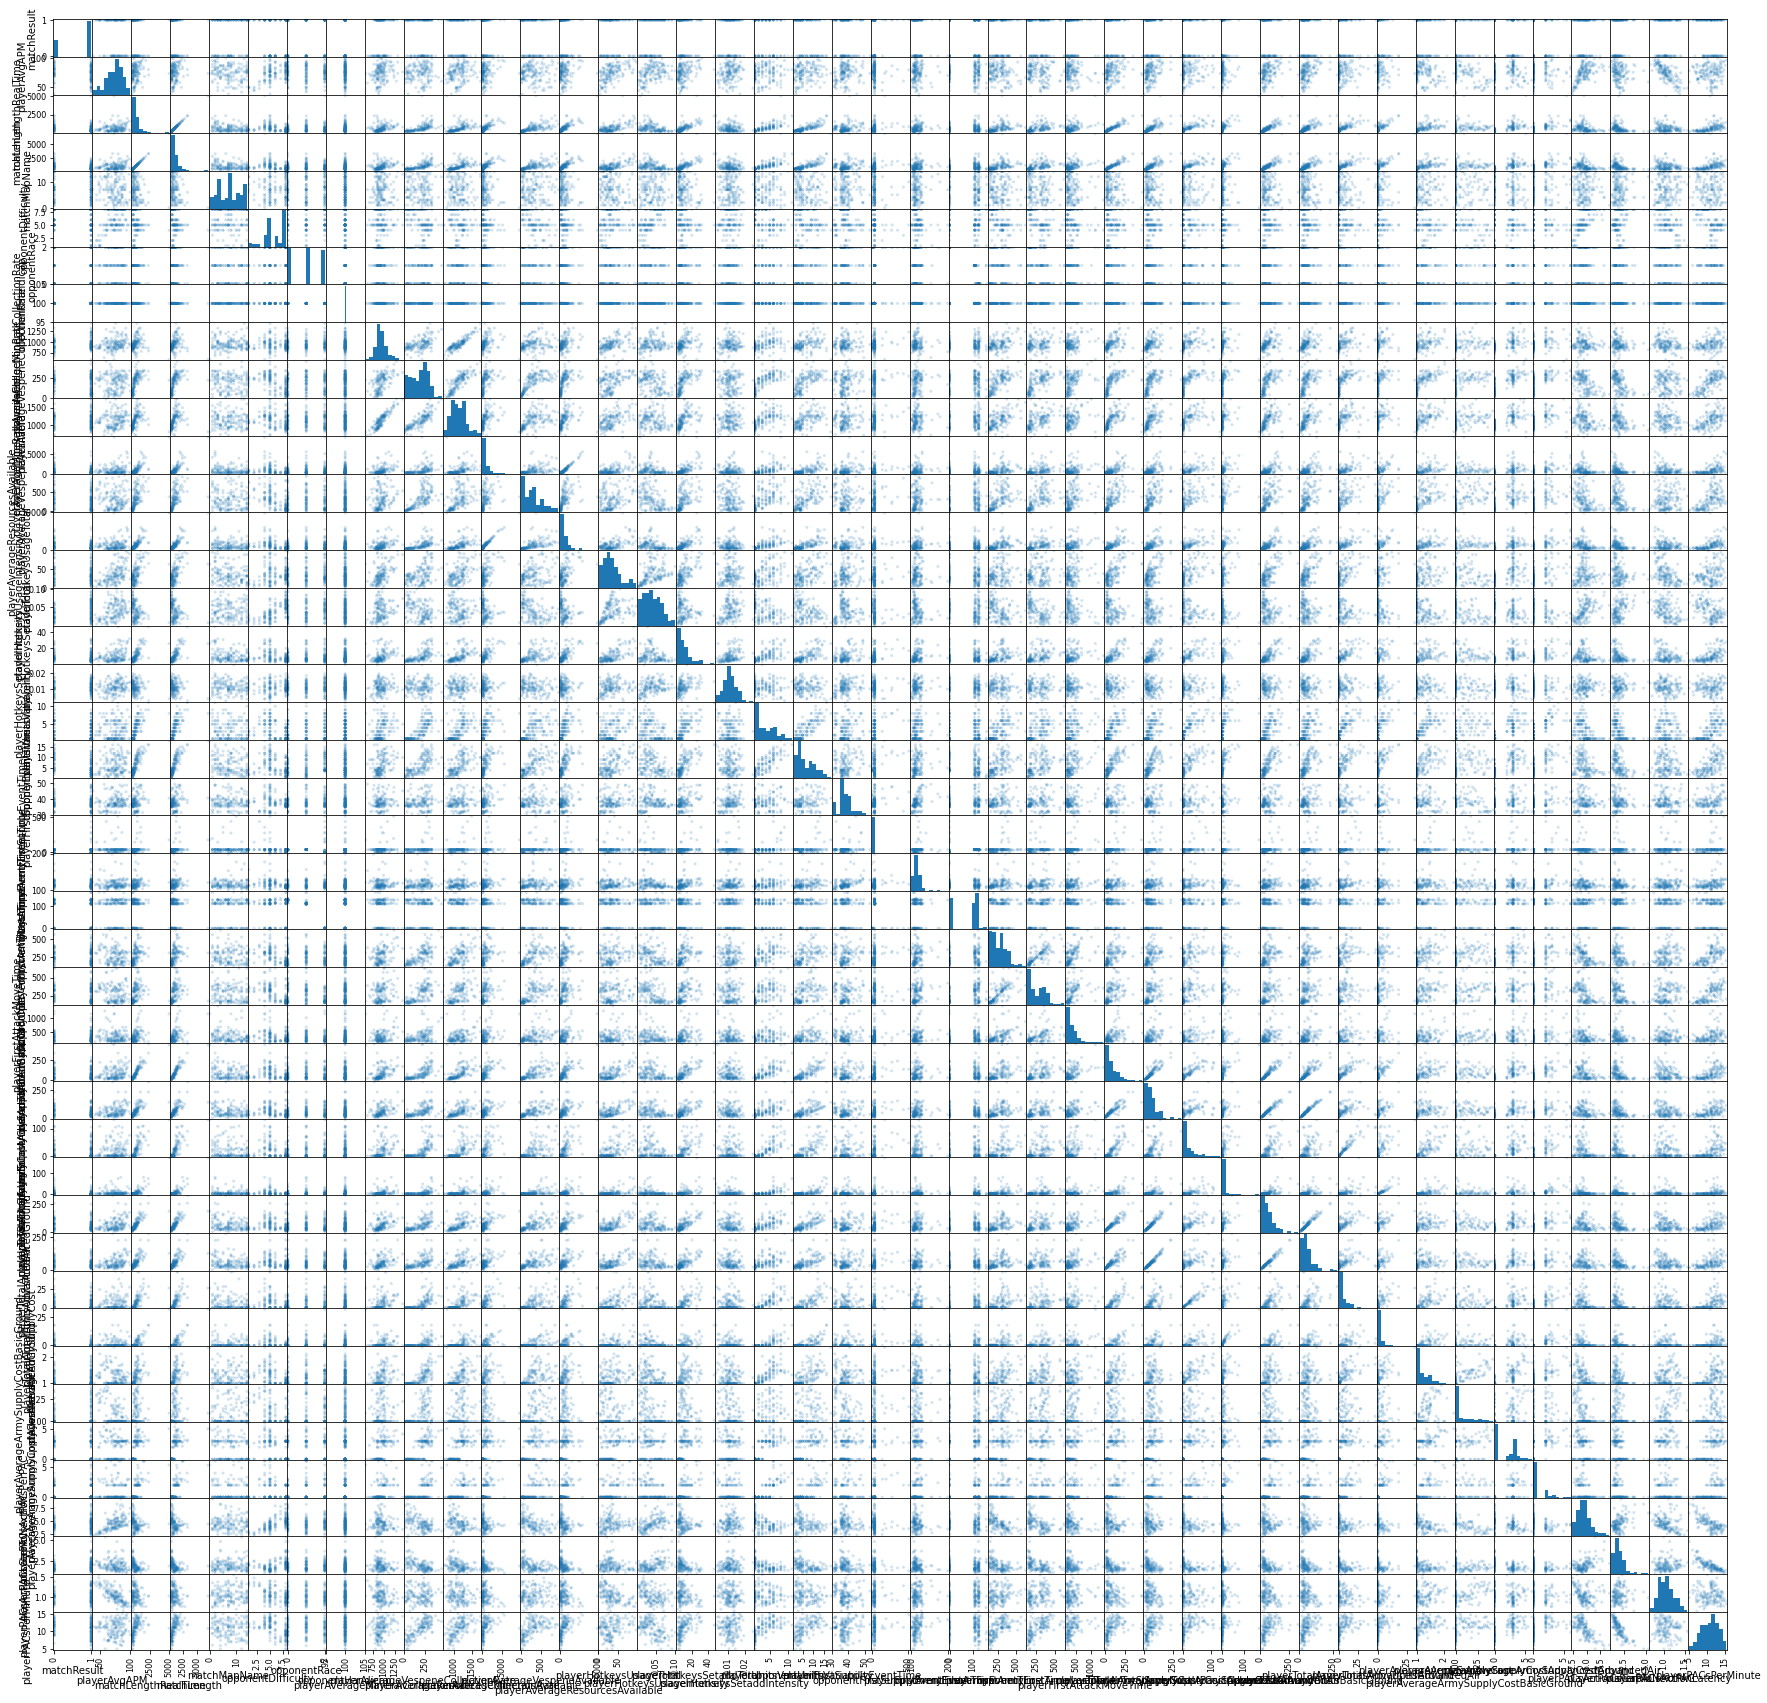

In [15]:
# from pandas.tools.plotting import scatter_matrix

# scatter_matrix(data[data.columns], figsize=(10,10))
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(30,30))

In [28]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
X_all = data.drop(['matchResult'],1)
y_all = data['matchResult']

from sklearn.preprocessing import scale

for col in X_all.columns:
  X_all[col] = scale(X_all[col])

In [29]:
display(X_all.head())

,playerAvgAPM,matchLengthRealTime,matchLength,matchMapName,opponentDifficulty,opponentRace,opponentHandicap,playerAverageMineralCollectionRate,playerAverageVespeneCollectionRate,playerAverageResourcesCollectionRate,playerAverageMineralsAvailable,playerAverageVespeneAvailable,playerAverageResourcesAvailable,playerHotkeysUsageTotal,playerHotkeysUsageIntensity,playerHotkeysSetaddTotal,playerHotkeysSetaddIntensity,playerUnitsVariability,opponentUnitsVariability,playerFirstSupplyEventTime,opponentFirstSupplyEventTime,playerFirstArmyEventTime,opponentFirstArmyEventTime,playerFirstArmyLostTime,opponentFirstArmyLostTime,playerFirstAttackMoveTime,playerTotalArmySupplyCost,playerTotalArmySupplyCostBasicGround,playerTotalArmySupplyCostAdvancedGround,playerTotalArmySupplyCostAdvancedAir,playerTotalArmyUnits,playerTotalArmyUnitsBasicGround,playerTotalArmyUnitsAdvancedGround,playerTotalArmyUnitsAdvancedAir,playerAverageArmySupplyCost,playerAverageArmySupplyCostBasicGround,playerAverageArmySupplyCostAdvancedGround,playerAverageArmySupplyCostAdvancedAir,playerPACsActionsPerPAC,playerPACsGapToNextPAC,playerPACsActionLatency,playerPACsPerMinute
0,-2.591884,-0.509591,-0.509591,1.145536,-2.556667,0.017440,0.0,-0.522755,-0.206584,-0.444335,-0.295837,0.154620,-0.245645,-0.769148,-0.479792,-0.624730,-0.400105,-0.628983,-1.146188,-0.109473,-0.060446,-0.281458,0.547361,0.384511,0.284423,-0.890699,-0.766043,-0.708843,-0.718211,-0.351139,-0.711525,-0.643725,-0.691973,-0.462617,-0.874272,-0.696839,-1.054997,-0.622379,-1.750821,0.205227,1.703838,0.163810
1,-1.984971,-0.522296,-0.522296,-0.314895,-2.556667,0.017440,0.0,-0.164293,-0.563746,-0.388833,-0.017037,-0.495852,-0.103587,-1.275369,-1.259620,-0.357656,0.554105,-0.230998,-1.146188,-0.633389,-0.068165,0.709444,0.803159,-0.578110,0.691270,-0.044840,-0.766043,-0.708843,-0.718211,-0.351139,-0.868332,-0.827739,-0.691973,-0.462617,0.198123,2.033612,-1.054997,-0.622379,-1.520286,0.087078,1.985125,0.482855
2,-1.910819,-0.368023,-0.368023,1.145536,-2.556667,0.017440,0.0,-0.465892,0.576735,-0.015921,-0.148377,1.845717,0.190107,-1.045268,-1.047553,0.042956,1.115980,-0.230998,-0.396623,0.089615,-0.062376,3.086922,0.542535,0.708549,0.633486,-0.640579,-0.535639,-0.322611,-0.718211,-0.351139,-0.535117,-0.436710,-0.691973,-0.462617,-0.156150,1.131588,-1.054997,-0.622379,-1.424134,-0.044211,1.370434,0.636501
3,-1.977858,-0.270014,-0.270014,-0.071490,-2.556667,-1.229485,0.0,-0.491687,0.385201,-0.128435,-0.172783,1.978948,0.191189,-0.723127,-0.732826,-0.224118,0.031761,-0.628983,-0.646478,-0.151386,-0.111258,-0.315865,0.503119,0.854387,0.868946,-0.390460,-0.356437,-0.022208,-0.718211,-0.351139,-0.339109,-0.206693,-0.691973,-0.462617,-0.036463,1.436326,-1.054997,-0.622379,-1.334092,0.181749,1.704167,0.171115
4,-1.918025,-0.540446,-0.540446,1.632346,-2.032128,-1.229485,0.0,-0.819310,0.280978,-0.394298,-0.383971,0.159833,-0.326065,-1.321389,-1.320717,-0.357656,0.638137,0.166987,-0.896333,0.131529,-0.098394,-0.625522,0.660781,-0.963418,0.530103,-0.767913,-0.740443,-0.837588,-0.434498,-0.351139,-0.868332,-0.896744,-0.364317,-0.462617,0.466222,1.242402,0.498000,-0.622379,-1.327201,-0.421128,1.686652,0.557665


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    test_size = 50,
                                                    random_state = 42,
                                                    stratify = y_all)

In [34]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label=1), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [35]:
classifier = LogisticRegression(random_state = 42)

In [36]:
train_predict(classifier, X_train, y_train, X_test, y_test)

Training a LogisticRegression using a training set size of 93. . .
Trained model in 0.0186 seconds
Made predictions in 0.0008 seconds.
0.9774436090225563 0.967741935483871
F1 score and accuracy score for training set: 0.9774 , 0.9677.
Made predictions in 0.0007 seconds.
F1 score and accuracy score for test set: 0.8889 , 0.8400.
